/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


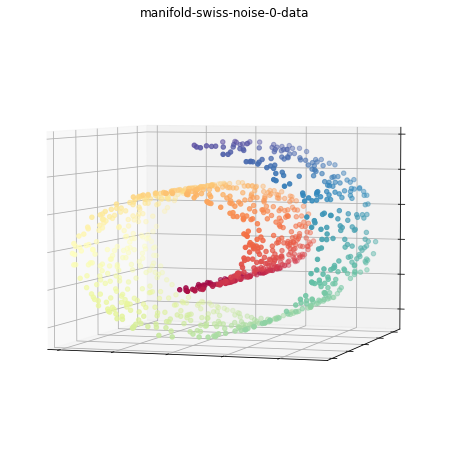

Isomap: 0.51 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


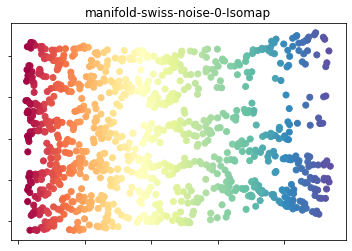

PCA: 0.0028 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


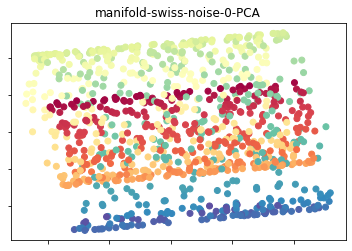

LLE: 0.16 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


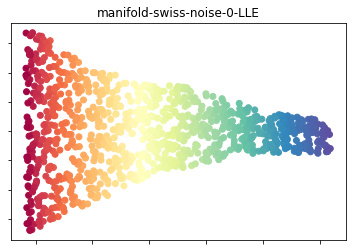

MDS: 2 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


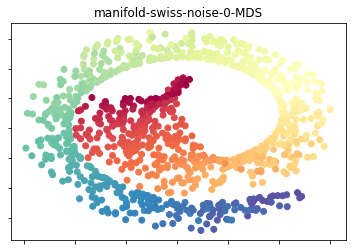

SE: 0.25 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


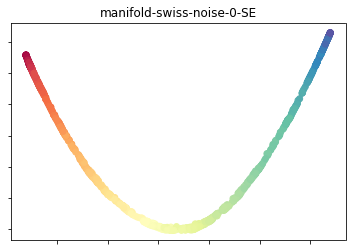

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE: 2.5 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


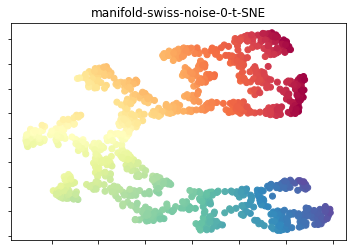

kPCA: 0.099 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


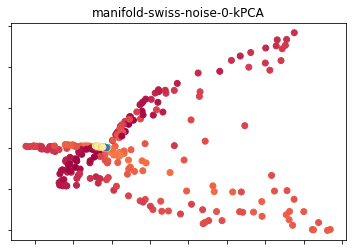

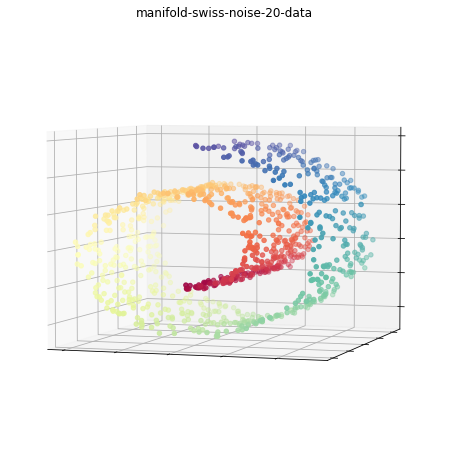

Isomap: 0.43 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


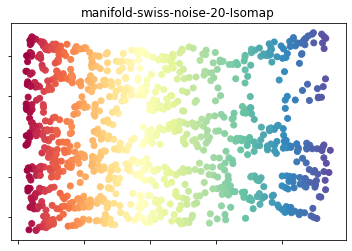

PCA: 0.0025 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


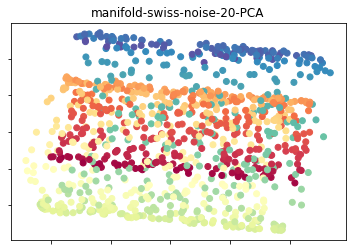

LLE: 0.14 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


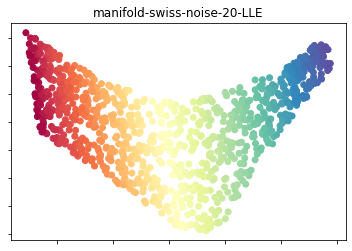

MDS: 2 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


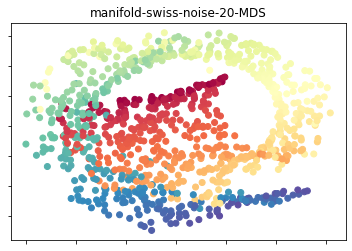

SE: 0.22 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


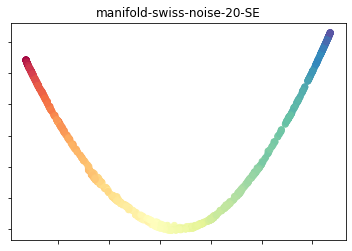

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE: 2.4 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


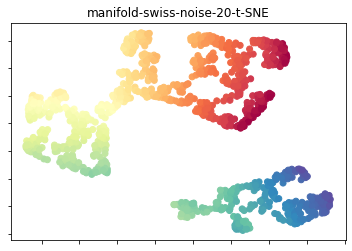

kPCA: 0.093 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


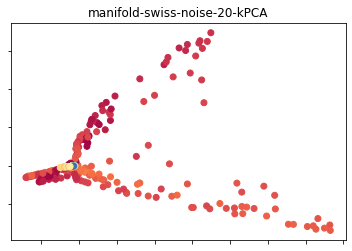

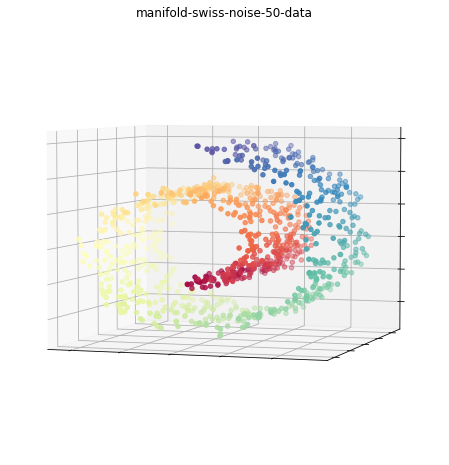

Isomap: 0.44 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


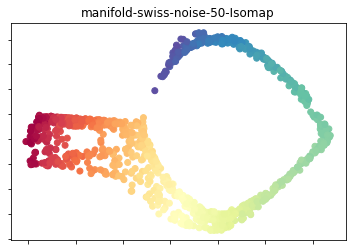

PCA: 0.0026 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


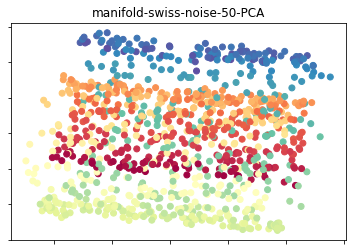

LLE: 0.13 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


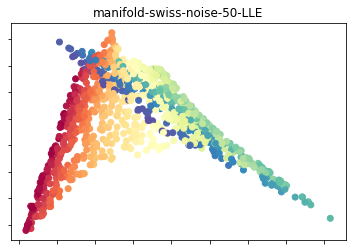

MDS: 2 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


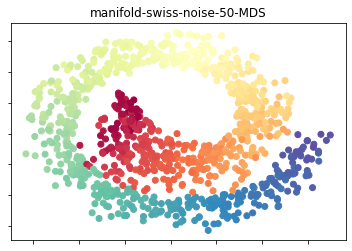

SE: 0.23 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


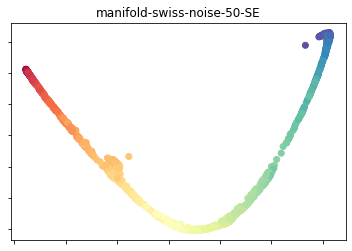

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE: 2.5 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


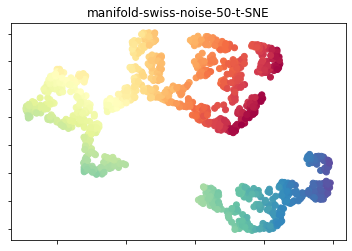

kPCA: 0.087 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


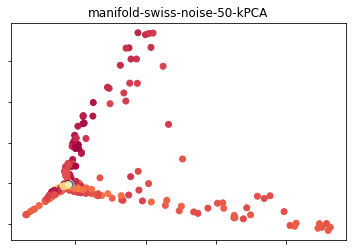

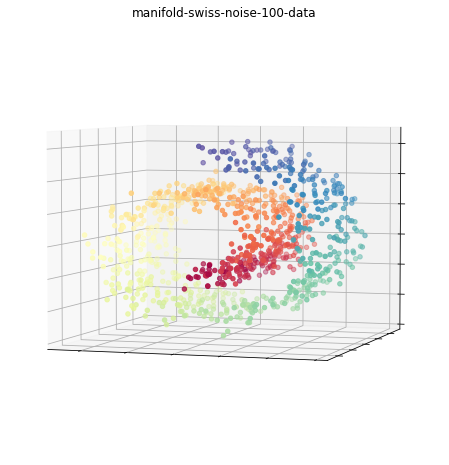

Isomap: 0.47 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


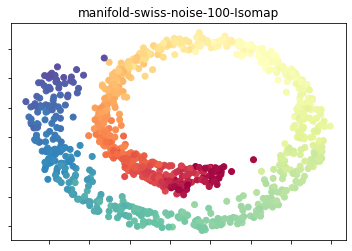

PCA: 0.0023 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


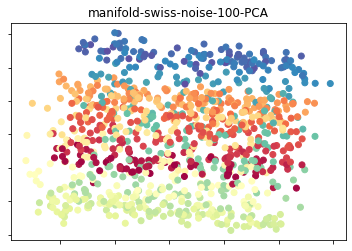

LLE: 0.15 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


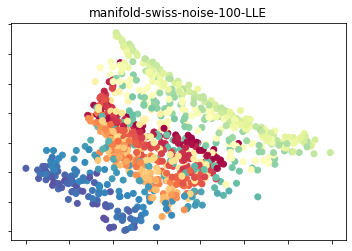

MDS: 2 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


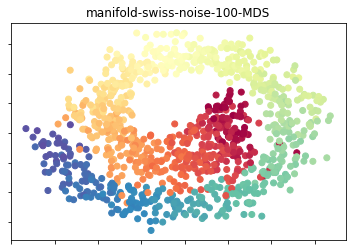

SE: 0.27 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


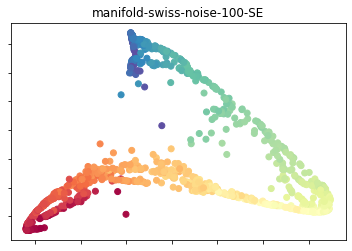

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE: 2.5 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


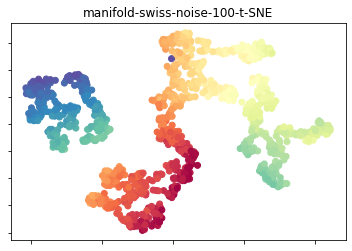

kPCA: 0.069 sec


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


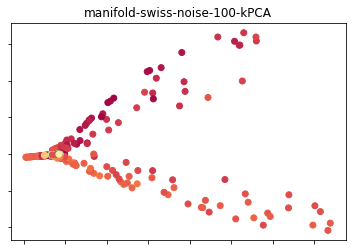

In [6]:
# Compare manifold learning methods
# https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>
# Modified by Kevin Murphy


from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

try:
    from sklearn import manifold, datasets, decomposition
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn import manifold, datasets, decomposition

try:
    from probml_utils import savefig
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig

# Next line to silence pyflakes. This import is needed.
Axes3D


def run_expt(X, color, expt_name):
    n_neighbors = 10
    n_components = 2

    # Create figure
    fig = plt.figure(figsize=(15, 8))
    # fig = plt.figure()
    # fig.suptitle("Manifold Learning with %i points, %i neighbors"
    #             % (1000, n_neighbors), fontsize=14)

    # Add 3d scatter plot
    # ax = fig.add_subplot(251, projection='3d')
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.zaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
    ttl = "{}-data".format(expt_name)
    ax.set_title(ttl)
    savefig("{}.pdf".format(ttl))
    plt.show()

    # Set-up manifold methods
    LLE = partial(
        manifold.LocallyLinearEmbedding, n_neighbors=n_neighbors, n_components=n_components, eigen_solver="auto"
    )

    methods = OrderedDict()
    methods["Isomap"] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)

    methods["PCA"] = decomposition.TruncatedSVD(n_components=n_components)
    methods["LLE"] = LLE(method="standard")
    # methods['LTSA'] = LLE(method='ltsa')
    # methods['Hessian LLE'] = LLE(method='hessian')
    # methods['Modified LLE'] = LLE(method='modified')

    methods["MDS"] = manifold.MDS(n_components, max_iter=100, n_init=1)
    methods["SE"] = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    methods["t-SNE"] = manifold.TSNE(n_components=n_components, init="pca", random_state=0)
    methods["kPCA"] = decomposition.KernelPCA(n_components=n_components, kernel="rbf")

    # Plot results
    for i, (label, method) in enumerate(methods.items()):
        t0 = time()
        Y = method.fit_transform(X)
        t1 = time()
        print("%s: %.2g sec" % (label, t1 - t0))
        fig = plt.figure()
        # ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
        ax = fig.add_subplot(111)
        ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
        # ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
        ttl = "{}-{}".format(expt_name, label)
        ax.set_title(ttl)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis("tight")
        savefig("{}.pdf".format(ttl))
        plt.show()


n_points = 1000
noise_levels = [0, 0.2, 0.5, 1.0]
dataset_name = "swiss"
for noise_ndx, noise in enumerate(noise_levels):
    expt_name = "manifold-{}-noise-{}".format(dataset_name, int(noise * 100))
    # X, color = datasets.make_s_curve(n_points, random_state=0)
    X, color = datasets.make_swiss_roll(n_points, noise=noise, random_state=42)
    run_expt(X, color, expt_name)